In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import os
os.chdir("C:\\Users\\DELL\\Downloads\\Python Foundation Case Study 3 - Insurance Claims Case Study")

# 1

In [29]:
claims=pd.read_csv('claims.csv')
cust_data=pd.read_csv('cust_demographics.csv')
cust_claim=pd.merge(left=claims,right=cust_data,how='left',left_on='customer_id',right_on='CUST_ID')
cust_claim



,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


# 2

In [30]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

# 3

In [31]:
cust_claim.claim_amount=cust_claim.claim_amount.str.replace("$","").astype('float64')


C:\Users\DELL\AppData\Local\Temp/ipykernel_7960/1330781171.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim.claim_amount=cust_claim.claim_amount.str.replace("$","").astype('float64')


# 4 . Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [32]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
injury=cust_claim[cust_claim.claim_type=='Injury only']
injury['flag']=np.where(injury.police_report=='Yes',1,np.where(injury.police_report=='No',0,np.nan))

C:\Users\DELL\AppData\Local\Temp/ipykernel_7960/2702740203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury['flag']=np.where(injury.police_report=='Yes',1,np.where(injury.police_report=='No',0,np.nan))


# 5

In [34]:
cust_claim.claim_date=cust_claim.claim_date.astype('datetime64')

x=pd.pivot_table(data=cust_claim,index='customer_id',values='claim_date',aggfunc='max')
x

,claim_date
customer_id,
154557,2018-04-10
263204,2018-04-04
287476,2017-10-17
441097,2018-03-21
524545,2018-07-27
...,...
99674324,2018-07-07
99723844,2018-01-06
99761663,2018-04-04


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [35]:
cust_claim.total_policy_claims=cust_claim.total_policy_claims.astype('object')
cust_claim.DateOfBirth=cust_claim.DateOfBirth.astype('datetime64')
cust_claim.CUST_ID=cust_claim.CUST_ID.astype('object')
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   object        
 9   fraudulent           1100 non-null   object        
 10  CUST_ID              1085 non-null   object        
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

In [264]:
cust_claim.DateOfBirth=np.where(cust_claim.DateOfBirth.dt.year>2018,cust_claim.DateOfBirth-pd.DateOffset(years=100),cust_claim.DateOfBirth)

In [36]:
cust_claim

#cust_claim.claim_amount.isna().sum()
#cust_claim.claim_amount=np.where(cust_claim.claim_amount.isna()==True,cust_claim.claim_amount.mean(),cust_claim.claim_amount)
#cust_claim.total_policy_claims=np.where(cust_claim.total_policy_claims.isna()==True,cust_claim.total_policy_claims.mode(),cust_claim.total_policy_claims)
#cust_claim.CUST_ID=np.where(cust_claim.CUST_ID.isna()==True,cust_claim.CUST_ID.mode(),cust_claim.CUST_ID)
#cust_claim.gender=np.where(cust_claim.gender.isna()==True,cust_claim.gender.mode(),cust_claim.gender)
#cust_claim.Segment=np.where(cust_claim.Segment.isna()==True,cust_claim.Segment.mode(),cust_claim.Segment)
#cust_claim.State=np.where(cust_claim.State.isna()==True,cust_claim.State.mode(),cust_claim.State)
#cust_claim.Contact=np.where(cust_claim.Contact.isna()==True,cust_claim.Contact.mode(),cust_claim.Contact)




,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN


In [55]:
cat_col = ['total_policy_claims','CUST_ID','gender','DateOfBirth','State','Contact','Segment']
con_col = ['claim_amount']
#claimid, claim_date

for col in cat_col:
    cust_claim[col] = cust_claim[col].fillna(cust_claim[col].mode()[0])
    
cust_claim[con_col] = cust_claim[con_col].fillna(cust_claim[con_col].mean())
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,38.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,-52.0,Children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,34.0,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,32.0,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,41.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,NaN,Children
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,NaN,Children
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,NaN,Children
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,NaN,Children


### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18

Youth 18-30

Adult 30-60

Senior > 60


In [56]:
import datetime
from datetime import datetime as dt


In [260]:
cust_claim.claim_date.max()

Timestamp('2018-10-30 00:00:00')

In [87]:
cust_claim['age']=(cust_claim.claim_date.dt.year)-(cust_claim.DateOfBirth.dt.year)
cust_claim['category']=np.where(cust_claim.age>60,'Senior',np.where(cust_claim.age>=30,'Adult',np.where(cust_claim.age>=18,'Youth','Children')))
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,38,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,-52,Children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,34,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,32,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,41,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,45,Adult
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult


## 8. What is the average amount claimed by the customers from various segments?

In [88]:
#cust_claim.info()
pd.pivot_table(data=cust_claim,index='Segment',values='claim_amount',aggfunc='mean')


,claim_amount
Segment,
Gold,12746.446802
Platinum,12340.893306
Silver,12206.379320


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [89]:
cust_claims=cust_claim[(cust_claim.claim_date>'2018-09-10')&(cust_claim.claim_date<'2018-10-01')]
pd.pivot_table(data=cust_claims,index='incident_cause',values='claim_amount',aggfunc='sum')

,claim_amount
incident_cause,
Crime,6840.000000
Driver error,14572.125121
Natural causes,8418.000000
Other causes,247198.125121
Other driver error,47599.500000


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [90]:
z=cust_claim[cust_claim.category=='Adult'][(cust_claim.State=='TX')|(cust_claim.State=='DE')|(cust_claim.State=='AK')]
z[(z.incident_cause=='Driver error')|(z.incident_cause=='Other driver error')].category.count()

C:\Users\DELL\AppData\Local\Temp/ipykernel_7960/3070113665.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z=cust_claim[cust_claim.category=='Adult'][(cust_claim.State=='TX')|(cust_claim.State=='DE')|(cust_claim.State=='AK')]


17

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

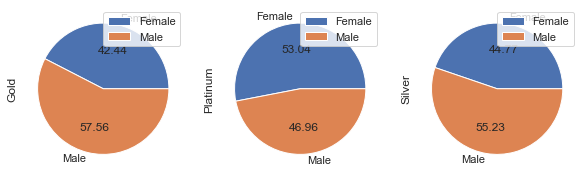

In [104]:
cust_claim
pd.pivot_table(data=cust_claim,index=['gender'],columns='Segment',values='claim_amount',aggfunc='sum').plot(kind='pie',autopct='%3.2f',subplots=True,figsize=[10,10])

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


<AxesSubplot:xlabel='gender'>

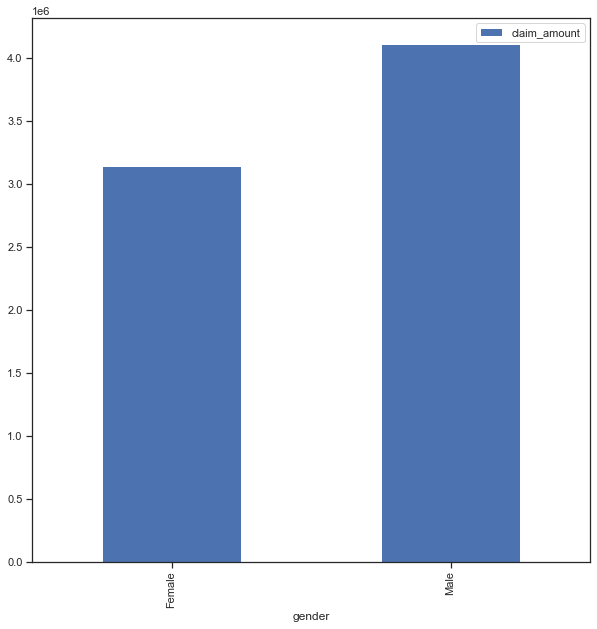

In [115]:
w=cust_claim[(cust_claim.incident_cause=='Driver error')|(cust_claim.incident_cause=='Other driver error')]
pd.pivot_table(data=w,index='gender',values='claim_amount',aggfunc='sum').plot(kind='bar',figsize=[10,10])


### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<AxesSubplot:xlabel='category'>

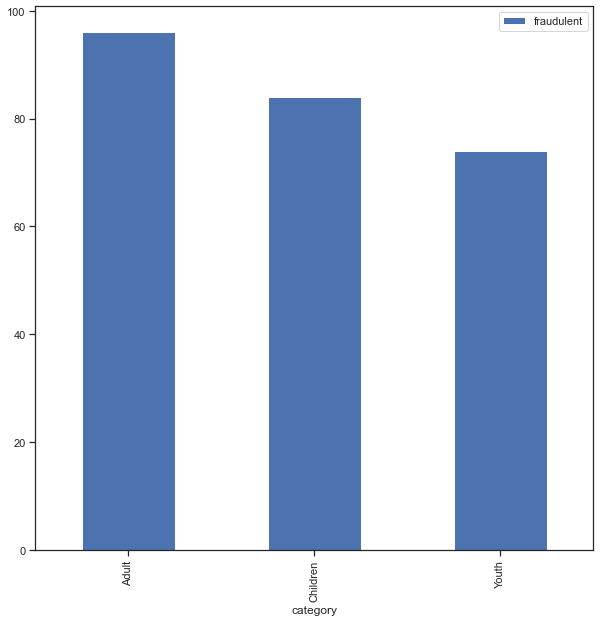

In [122]:
q=cust_claim[cust_claim.fraudulent=='Yes']
pd.pivot_table(data=q,index='category',values='fraudulent',aggfunc='count').plot(kind='bar',figsize=[10,10])


### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

<AxesSubplot:xlabel='month'>

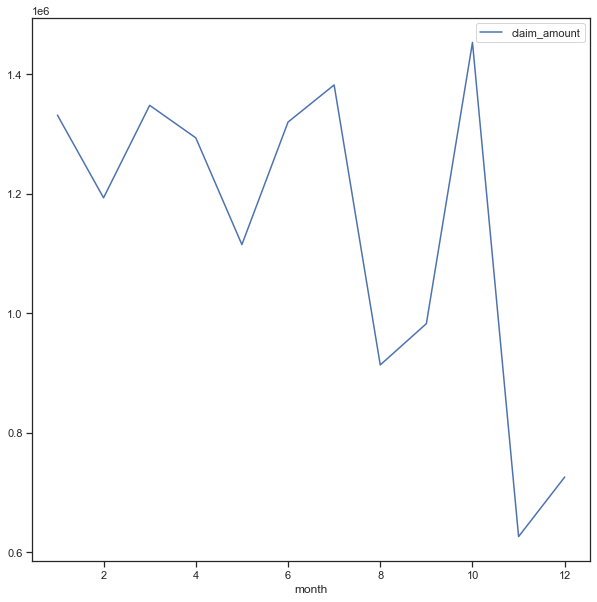

In [137]:
cust_claim['month']=cust_claim.claim_date.dt.month
x=pd.pivot_table(data=cust_claim,index='month',values='claim_amount',aggfunc='sum')
x.plot(kind='line',figsize=[10,10])



## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [150]:
fraudulent=cust_claim[cust_claim.fraudulent=='Yes']
non_fraudulent=cust_claim[cust_claim.fraudulent=='No']

In [153]:
cust_claim
fraud_gender_age=pd.pivot_table(data=fraudulent,index='gender',columns='category',values='claim_amount',aggfunc='mean')
fraud_gender_age

category,Adult,Children,Youth
gender,,,
Female,17910.697927,6231.041672,7595.972236
Male,18749.257820,14040.931550,10681.312510


In [154]:
non_fraud_gender_age=pd.pivot_table(data=non_fraudulent,index='gender',columns='category',values='claim_amount',aggfunc='mean')

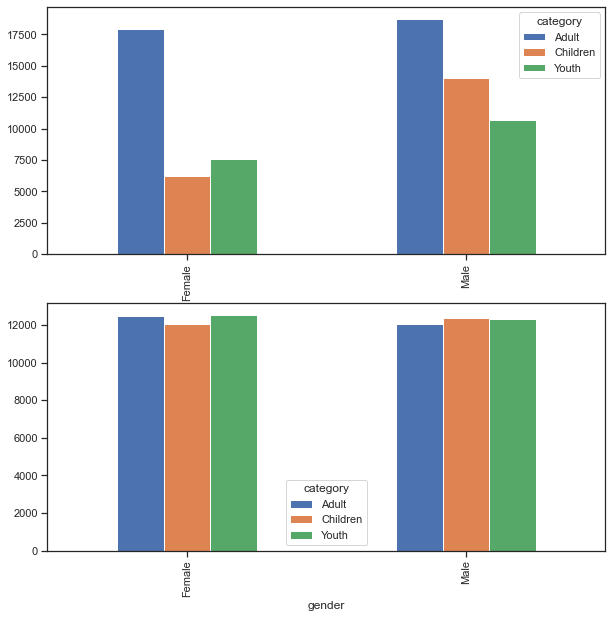

In [161]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[10,10])
fraud_gender_age.plot.bar(ax=axes[0])
non_fraud_gender_age.plot.bar(ax=axes[1])

plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.


#### 16. Is there any similarity in the amount claimed by males and females?   

In [162]:
import scipy.stats as stats


HO:males claimed=female claimed

H1:males claimed != female claimed

In [171]:
m=cust_claim[cust_claim.gender=="Male"]
f=cust_claim[cust_claim.gender=="Female"]
stats.ttest_ind(m.claim_amount,f.claim_amount)


Ttest_indResult(statistic=0.910525219359747, pvalue=0.3627454254155197)

conclusion: we fail to reject null hypothesis, so there is similarity between male and female claimed

### 17. Is there any relationship between age category and segment?




H0: There is no relation between age category and segment

H1: There is relatioship between age category and segment

In [184]:
x=pd.crosstab(cust_claim.category,cust_claim.Segment)
stats.chi2_contingency(x)

(5.070479496234779,
 0.28014200887776347,
 4,
 array([[156.35454545, 145.12909091, 139.51636364],
        [119.12727273, 110.57454545, 106.29818182],
        [114.51818182, 106.29636364, 102.18545455]]))

conclusion: we fail to reject null hypotheis, so there is no relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
HO:current year average==10000
H1:current year average != 10000    

In [209]:
cust_claim['year']=cust_claim.claim_date.dt.year
y=cust_claim[(cust_claim.year==2018)]
stats.ttest_1samp(y.claim_amount,10000)

Ttest_1sampResult(statistic=4.359707103269088, pvalue=1.5862380370283107e-05)

conclusion: we can reject null hypothesis with 99 percent confidence

In [199]:
y.claim_amount.mean()

12638.007599405428

There is a significant rise in claim amount 

### 19. Is there any difference between age groups and insurance claims?

H0:avg_adult=avg_senior=avg_children
H1:avg_adult=!avg_senior!=avg_children

In [232]:
children=cust_claim.total_policy_claims[cust_claim.category=='Children']
adult=cust_claim.total_policy_claims[cust_claim.category=='Adult']
youth=cust_claim.total_policy_claims[cust_claim.category=='Youth']


In [233]:
stats.f_oneway(children,adult,youth)

F_onewayResult(statistic=0.22979369874605388, pvalue=0.7947357764556859)

conclusion:There is no difference between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?


HO:There is no relationship between claim_amount and total policy claim

H1:There is relationship between  claim_amount and total policy claim

In [218]:
stats.pearsonr(cust_claim.claim_amount,cust_claim.total_policy_claims)

(-0.01999801579350994, 0.5076051510518916)